<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/KMeans_DBSCAN_Heirarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **K Means Clustering**

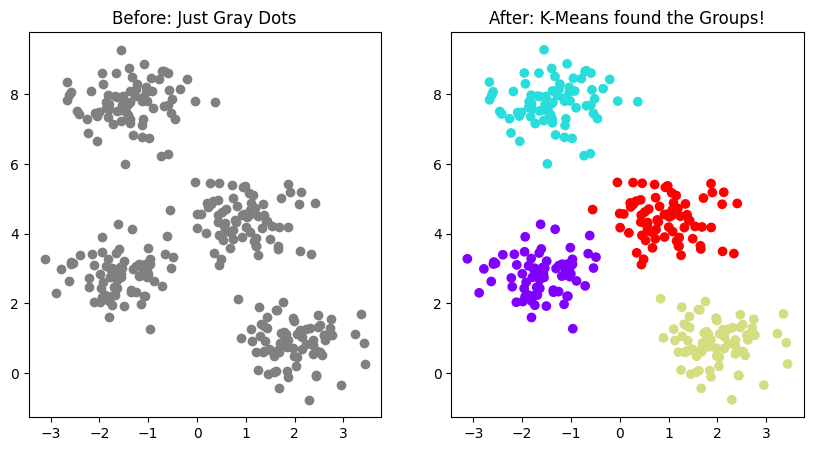

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Create 300 random dots that naturally form 4 clumps
# (Think of this as 4 tables in the cafeteria)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Run K-Means
# We tell the computer: "I think there are 4 groups. Find them."
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Show the Magic
plt.figure(figsize=(10, 5))

# Plot 1: The Messy Room
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray')
plt.title("Before: Just Gray Dots")

# Plot 2: The Organized Groups
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')
plt.title("After: K-Means found the Groups!")

plt.show()

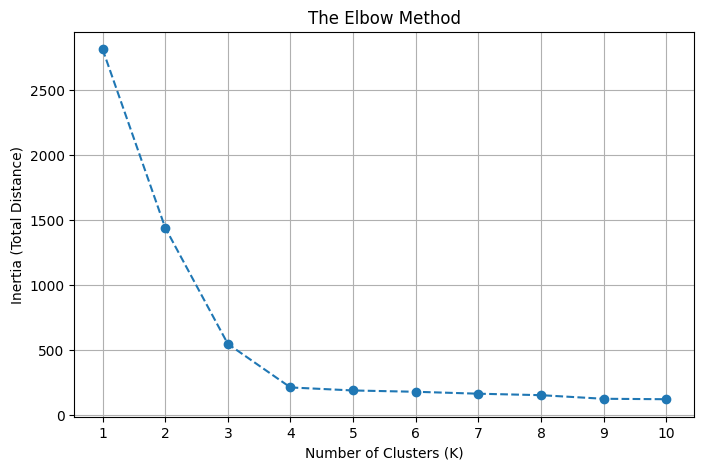

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Create the same data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. The Experiment Loop
inertia = [] # We will store the scores here

for k in range(1, 11):  # Try K from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # Store the "Walking Distance" score

# 3. Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Total Distance)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# **DBSCAN**

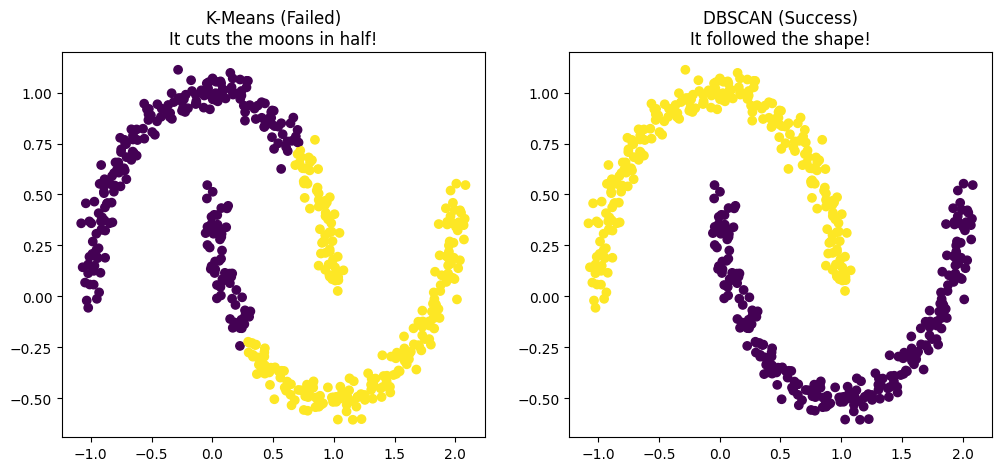

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

# 1. Generate "Moon" Data (Messy shapes)
# noise=0.05 makes the moons slightly fuzzy
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# 2. Run K-Means (The Fail)
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

# 3. Run DBSCAN (The Hero)
# eps=0.3: The "Reach" distance
# min_samples=5: Need 5 neighbors to be a core point
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 4. Plot the Battle
plt.figure(figsize=(12, 5))

# Plot 1: K-Means Result
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means (Failed)\nIt cuts the moons in half!")

# Plot 2: DBSCAN Result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN (Success)\nIt followed the shape!")

plt.show()

## **Hererical Clustering**

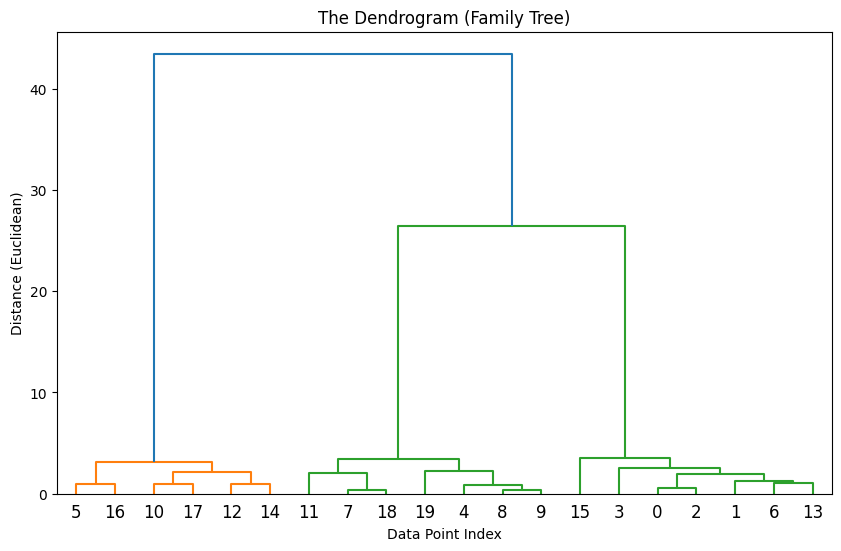

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs

# 1. Create simple data (3 groups)
X, _ = make_blobs(n_samples=20, centers=3, random_state=42)
# Note: I used only 20 samples so the tree is easy to read!

# 2. Build the "Linkage" Matrix (The Math of who is close to whom)
# method='ward' minimizes variance (keeps groups tight)
dendrogram_data = sch.linkage(X, method='ward')

# 3. Draw the Dendrogram
plt.figure(figsize=(10, 6))
plt.title("The Dendrogram (Family Tree)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance (Euclidean)")

sch.dendrogram(dendrogram_data)

plt.show()